In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, svm

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/Teaching_Review_Evaluation.csv')

In [3]:
data.head()

,Unnamed: 0,English speaker,Course instructor,Course,Summer or regular semester,Class size,Class attribute
0,0,1,23,3,1,19,3
1,1,2,15,3,1,17,3
2,2,1,23,3,2,49,3
3,3,1,5,2,2,33,3
4,4,2,7,11,2,55,3


In [4]:
data1=data.drop(['Unnamed: 0'],axis=1)

In [5]:
data1.tail()

,English speaker,Course instructor,Course,Summer or regular semester,Class size,Class attribute
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1
150,2,2,10,2,27,1


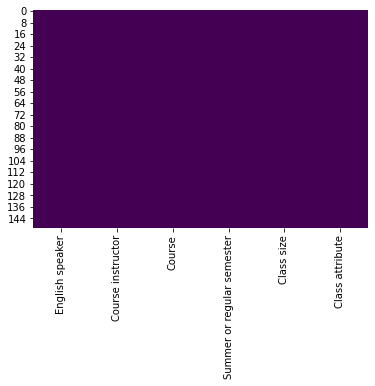

In [6]:
import seaborn as sns
sns.heatmap(data1.isnull(),cbar=False,cmap='viridis')

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   English speaker             151 non-null    int64
 1   Course instructor           151 non-null    int64
 2   Course                      151 non-null    int64
 3   Summer or regular semester  151 non-null    int64
 4   Class size                  151 non-null    int64
 5   Class attribute             151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [8]:
data1.describe()

,English speaker,Course instructor,Course,Summer or regular semester,Class size,Class attribute
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [9]:
import pandas_profiling

In [10]:
pandas_profiling.ProfileReport(data1)

In [11]:
data1.columns

Index(['English_speaker', 'Course_instructor', 'Course',
       'Summer_or_regular_semester', 'Class_size', 'Class_attribute'],
      dtype='object')

In [12]:
x=data1[['English_speaker', 'Course_instructor', 'Course',
       'Summer_or_regular_semester', 'Class_size']]
y=data1['Class_attribute']

In [13]:
x

,English_speaker,Course_instructor,Course,Summer_or_regular_semester,Class_size
0,1,23,3,1,19
1,2,15,3,1,17
2,1,23,3,2,49
3,1,5,2,2,33
4,2,7,11,2,55
...,...,...,...,...,...
146,2,3,2,2,26
147,2,10,3,2,12
148,1,18,7,2,48
149,2,22,1,2,51


In [14]:
y

0      3
1      3
2      3
3      3
4      3
      ..
146    1
147    1
148    1
149    1
150    1
Name: Class_attribute, Length: 151, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
import time

In [16]:
clf=svm.SVC(gamma='auto',probability=True,kernel='rbf')
clf.fit(x,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [17]:
clf.decision_function(x)

array([[-0.21650192,  0.95718826,  2.22223983],
       [ 0.85281506, -0.18248216,  2.22223591],
       [ 0.83689527, -0.17000302,  2.22218536],
       [ 0.83833856, -0.17139284,  2.22222436],
       [ 0.83551317, -0.16879803,  2.22222546],
       [-0.22224353,  1.00008904,  2.22223364],
       [ 0.87729317, -0.19543596,  2.22221618],
       [ 0.876152  , -0.19494212,  2.222216  ],
       [ 0.83547845, -0.16881245,  2.22224706],
       [ 0.85335182, -0.18283976,  2.22223968],
       [ 0.83552502, -0.16876694,  2.22220615],
       [ 2.20353111, -0.22670126,  1.11938444],
       [ 0.84753575, -0.17880805,  2.22222585],
       [-0.1971975 ,  0.88151352,  2.22222325],
       [-0.17922858,  2.22222823,  0.84810897],
       [-0.16979364,  2.22222518,  0.83657531],
       [ 0.83354829,  2.22220895, -0.16685129],
       [-0.21818611,  2.21854388,  0.99701934],
       [-0.20397582,  2.22220266,  0.9009738 ],
       [ 0.83359973,  2.22221585, -0.16691792],
       [ 0.83387023,  2.22221757, -0.167

In [18]:
clf.support_vectors_

array([[ 2., 21.,  2.,  2., 42.],
       [ 2., 22.,  3.,  2., 28.],
       [ 2., 11.,  1.,  2., 51.],
       [ 2., 18.,  5.,  2., 19.],
       [ 2., 13.,  1.,  2., 31.],
       [ 1., 13.,  3.,  1., 13.],
       [ 2.,  4., 16.,  2., 21.],
       [ 2., 14., 15.,  2., 38.],
       [ 2., 21.,  2.,  2., 42.],
       [ 2., 22.,  3.,  2., 28.],
       [ 2., 11.,  1.,  2., 51.],
       [ 2., 18.,  5.,  2., 19.],
       [ 2., 13.,  1.,  2., 31.],
       [ 1., 13.,  3.,  1., 13.],
       [ 2.,  5.,  2.,  2., 37.],
       [ 2., 16.,  8.,  2., 36.],
       [ 2.,  4., 16.,  2., 21.],
       [ 2.,  5.,  2.,  2., 48.],
       [ 2., 14., 15.,  2., 38.],
       [ 2., 20.,  2.,  2., 14.],
       [ 1., 23.,  3.,  2., 38.],
       [ 2., 13.,  1.,  2., 29.],
       [ 2., 10.,  3.,  2., 19.],
       [ 1., 14., 15.,  2., 32.],
       [ 2.,  8.,  3.,  2., 27.],
       [ 2., 12.,  7.,  2., 34.],
       [ 2.,  8.,  7.,  2., 23.],
       [ 2., 15.,  1.,  2., 66.],
       [ 2., 23.,  3.,  2., 12.],
       [ 2.,  

In [19]:
clf.coef0 #bias

0.0

In [20]:
clf.classes_

array([1, 2, 3])

In [21]:
x_trine,x_test,y_trine,y_test=train_test_split(x,y,test_size=0.15,random_state=445)

In [22]:
trine_score=clf.score(x_trine,y_trine)
trine_score

0.9375

In [23]:
test_score=clf.score(x_test,y_test)
test_score

0.9130434782608695

In [24]:
y_predict=clf.predict(x_test)

In [25]:
y_predict

array([3, 2, 1, 3, 2, 1, 3, 1, 3, 2, 1, 2, 2, 3, 2, 1, 1, 1, 1, 3, 2, 2,
       3])

In [26]:
pd.DataFrame({'actual':y_test,'new_predict':y_predict})

,actual,new_predict
48,3,3
14,2,2
109,1,1
81,3,3
64,2,2
113,1,1
123,3,3
146,1,1
93,3,3
62,2,2


In [27]:
#linear kernal
clf=svm.SVC(gamma='auto',probability=True,kernel='linear')
clf.fit(x,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [28]:
x_trine,x_test,y_trine,y_test=train_test_split(x,y,test_size=0.30,random_state=40)

In [29]:
trine_score=clf.score(x_trine,y_trine)
trine_score

0.580952380952381

In [30]:
test_score=clf.score(x_test,y_test)
test_score

0.5869565217391305

In [31]:
y_predict=clf.predict(x_test)

In [32]:
y_predict

array([3, 2, 1, 2, 3, 1, 2, 2, 3, 3, 2, 1, 2, 3, 1, 1, 2, 3, 1, 3, 2, 1,
       1, 1, 2, 1, 3, 3, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 1, 3, 2, 3, 1, 1,
       2, 1])

In [33]:
pd.DataFrame({'actual':y_test,'new_predict':y_predict})

,actual,new_predict
126,3,3
66,2,2
116,1,1
124,3,2
125,3,3
137,2,1
38,1,2
64,2,2
97,2,3
96,2,3


In [34]:
for kernel in ('linear','rbf','poly'):
    clf=svm.SVC(kernel=kernel,gamma=10)
    clf.fit(x_trine,y_trine)
    
    print('traine score ',clf.score(x_trine,y_trine),clf)
    print('test score ',clf.score(x_test,y_test),clf)
    df=pd.DataFrame({'actual':y_test,'new_predict':y_predict})
    
print(df)

traine score  0.5428571428571428 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
test score  0.391304347826087 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
traine score  0.9619047619047619 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
test score  0.5 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
   